<a href="https://colab.research.google.com/github/snehaaa2004/Spaceweb-main/blob/main/mental_health_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
data = {
    'Age': [22, 30, 25, 35, 40, 29, 23, 50, 28, 31],
    'Gender': ['Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female'],
    'Work_Pressure': ['High', 'Medium', 'Low', 'High', 'High', 'Medium', 'Low', 'Medium', 'High', 'Low'],
    'Sleep_Quality': ['Poor', 'Good', 'Average', 'Poor', 'Poor', 'Good', 'Average', 'Average', 'Good', 'Poor'],
    'Family_History': ['Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'Mental_Health_Issue': ['Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No']
}

df = pd.DataFrame(data)
print(df.head())


   Age  Gender Work_Pressure Sleep_Quality Family_History Mental_Health_Issue
0   22  Female          High          Poor            Yes                 Yes
1   30    Male        Medium          Good             No                  No
2   25    Male           Low       Average             No                  No
3   35  Female          High          Poor            Yes                 Yes
4   40  Female          High          Poor            Yes                 Yes


In [ ]:
label = LabelEncoder()
for column in df.columns:
    df[column] = label.fit_transform(df[column])


In [ ]:
X = df.drop('Mental_Health_Issue', axis=1)
y = df['Mental_Health_Issue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[2 0]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



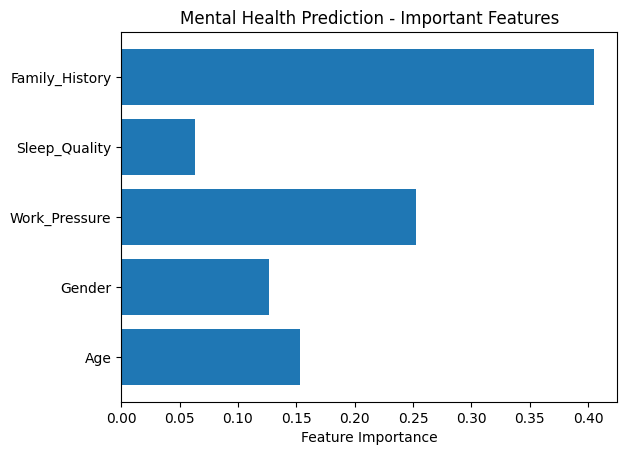

In [ ]:
importances = model.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel("Feature Importance")
plt.title("Mental Health Prediction - Important Features")
plt.show()
